In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


False False


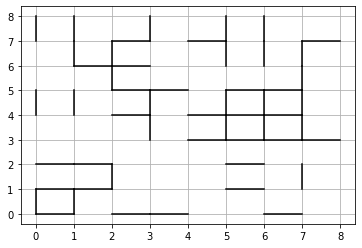

In [54]:
# square lattice
l = 2
r1 = 8
r2 = r1

 # loss error
prob_l = 0.4 # loss error probability
error_loss = np.random.rand(l*r1*r2) 
loss_inds = np.argwhere(error_loss < prob_l)[:,0]
remain_inds = np.argwhere(error_loss >= prob_l)[:,0]

Gy = nx.Graph()
Gy.add_nodes_from(np.arange(r1*r2))
Gx = nx.Graph()
Gx.add_nodes_from(np.arange(r1*r2))


for i2 in range(r2):
    for i1 in range(r1):
        ind1 = i2*r1+ i1
        ind2 = i2*r1 + ((i1+1)%r1)
        # cylinder along y
        if 2*ind1 in loss_inds:
            Gy.add_edge(ind1,ind2)
        if ind1 +r1 < r1*r2 and 2*ind1+1 in loss_inds:
            Gy.add_edge(ind1,ind1+r1)
        # cylinder along x
        ind2 = ((i2+1)%r2)*r1 + i1
        if 2*ind1+1 in loss_inds:
            Gx.add_edge(ind1,ind2)
        if i1+1 < r1 and 2*ind1 in loss_inds:
            Gx.add_edge(ind1,ind1+1)
          
# nx.draw(Gx, with_labels=True, font_weight='bold')
# plt.show()
# nx.draw(Gy, with_labels=True, font_weight='bold')
# plt.show()
# G.edges()
first_row = np.arange(r1)
last_row = np.arange((r2-1)*r1,r2*r1)
path_y = False
for i_first in first_row:
    for i_last in last_row:
        if nx.has_path(Gy,i_first,i_last):
            if 2*i_last+1 in loss_inds or (i_first - i_last )%r1 ==0:
                path_y = True
                break

first_col = np.arange(0,(r2-1)*r1+1,r1)
last_col = np.arange(r1-1,r2*r1+1,r1)
path_x = False
for i_first in first_col:
    for i_last in last_col:
        if nx.has_path(Gx,i_first,i_last):
            if 2*i_last in loss_inds or int(i_first/r1) == int(i_last/r1):
                path_x = True
                break

print(path_y,path_x)

plt.figure(1)
for i in range(len(loss_inds)):
    ind1 = int(loss_inds[i]/2)
    if loss_inds[i] % 2 == 0 :
        ind2 = int(int(loss_inds[i]/2)/r1)*r1 + (((int(loss_inds[i]/2)%r1)+1)%r1)
        # if not Gy.has_edge(ind1,ind2):
        #     print(ind1,ind2)
        assert Gy.has_edge(ind1,ind2)
        ind2 = ind1 + 1
        if (int(loss_inds[i]/2)%r1)+1 < r1:
            assert Gx.has_edge(ind1,ind2)     
    else:
        ind2 = ind1 + r1
        if ind2 < r1*r2:
            # if not Gy.has_edge(ind1,ind2):
                # print(ind1,ind2,"v")
            assert Gy.has_edge(ind1,ind2)
        ind2 = ((int(int(loss_inds[i]/2)/r1)+1)%r2)*r1 + (int(loss_inds[i]/2)%r1)
        assert Gx.has_edge(ind1,ind2)
            
    latt_pos = int(loss_inds[i]/2)
    if loss_inds[i] % 2 == 0 :
        ry = int(latt_pos/r1) 
        rx = (latt_pos%r1) 
        plt.plot([rx,rx+1],[ry,ry],color="k")
    else:
        ry = int(latt_pos/r1)  
        rx = (latt_pos%r1)   
        plt.plot([rx,rx],[ry,ry+1],color="k")

plt.xticks(np.arange(0,r1+1.))
plt.yticks(np.arange(0,r2+1.))
plt.grid()
plt.show()

In [ ]:
# import packages
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import percolate
from pprint import pprint

# # configure plotting colors
# colors = [
#     '#0e5a94',
#     '#eb008a',
#     '#37b349',
#     '#f29333',
#     '#00aabb',
#     '#b31e8d',
#     '#f8ca12',
#     '#7a2d00',
# ]
# mpl.rcParams['axes.color_cycle'] = colors

In [2]:
# number of parallel runs (sample states to evolve)
runs = 4
# system sizes
grid_ls = [3, 10, 32]
# generate the square grid graphs with spanning cluster detection
# for all system sizes
grid_graphs = [ percolate.spanning_2d_grid(l) for l in grid_ls ]
# compute the single-run cluster statistics for all sample states
# and system sizes
grid_single_runs = [
    [ percolate.single_run_arrays(graph=grid_graph) for _ in range(runs) ]
    for grid_graph in grid_graphs
]
# plot
fig, axes = plt.subplots(
    nrows=len(grid_ls), ncols=5, squeeze=True, figsize=(8.0, 6.0)
)
for l_index, l in enumerate(grid_ls):
    for single_run in grid_single_runs[l_index]:
        axes[l_index, 0].plot(
            single_run['has_spanning_cluster'], lw=4, alpha=0.7, rasterized=True
        )
        axes[l_index, 1].plot(
            single_run['max_cluster_size'], lw=4, alpha=0.7, rasterized=True
        )
        for k in range(3):
            axes[l_index, k + 2].plot(
                single_run['moments'][k], lw=4, alpha=0.7, rasterized=True
            )
    axes[l_index, 0].set_ylabel(r'L={}'.format(l))

    for ax in axes[l_index, :]:
        num_edges = grid_single_runs[l_index][0]['M']
        ax.set_xlim(xmax=num_edges)
        ax.set_xticks(np.linspace(0, num_edges, num=3))
        ax.set_xticklabels(['0', '', num_edges])
        ax.set_yticks(np.linspace(0, ax.get_ylim()[1], num=3))

    axes[l_index, 0].set_yticks([0, 1])

axes[0, 0].set_title(r'spanning?')
axes[0, 1].set_title(r'largest cluster')
for k in range(3):
    axes[0, k + 2].set_title(r'$M_{}$'.format(k))

for ax in axes[-1, :]:
    ax.set_xlabel(r'$n$')

plt.tight_layout(0)
plt.show()

KeyError: 0